In [2]:
import numpy as np
import pandas as pd
from time import time

from SVM import SVM
from mismatch_kernel import mismatch_kernel, preprocess

# from strkernel.gappy_kernel import gappypair_kernel
# from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

In [4]:
Xs, ys = [], []

for dataset in range(3):
    dna_strings = pd.read_csv(f'data/Xtr{dataset}.csv')
    labels = pd.read_csv(f'data/Ytr{dataset}.csv')

    X = preprocess(dna_strings['seq'])
    y = 2 * labels['Bound'].to_numpy() - 1
    Xs.append(X)
    ys.append(y)

In [5]:
kernels = [{}, {}, {}]

ks = list(range(3,14))

for dataset in range(3):
    for m in [0,1]:
        for k in ks:
            t0 = time()
            kernels[dataset][(k,m)] = mismatch_kernel(Xs[dataset], k, m, normalize=True)
            print(f'{(k,m)=}, time:{time() - t0:.1f}s')

    # for k in [2,3,4]:
    #     t0 = time()
    #     gappy = gappypair_kernel(dna_strings['seq'].to_list(), k=k, t=0, g=1, gapDifferent=False, sparse=True)
    #     gappy_kernel = (gappy @ gappy.T).toarray()
    #     temp = np.sqrt(np.diag(gappy_kernel))
    #     gappy_kernel = (gappy_kernel / temp) / temp[:,None]
    #     kernels[dataset][("gappy",k)] = gappy_kernel
    #     print(dataset, "gappy", k, time() - t0)

(k,m)=(3, 0), time:0.9s
(k,m)=(4, 0), time:0.3s
(k,m)=(5, 0), time:0.2s
(k,m)=(6, 0), time:0.1s
(k,m)=(7, 0), time:0.1s
(k,m)=(8, 0), time:0.1s
(k,m)=(9, 0), time:0.0s
(k,m)=(10, 0), time:0.1s
(k,m)=(11, 0), time:0.1s
(k,m)=(12, 0), time:0.1s
(k,m)=(13, 0), time:0.3s
(k,m)=(3, 1), time:0.6s
(k,m)=(4, 1), time:1.6s
(k,m)=(5, 1), time:3.8s
(k,m)=(6, 1), time:4.4s
(k,m)=(7, 1), time:3.6s
(k,m)=(8, 1), time:2.9s
(k,m)=(9, 1), time:2.2s
(k,m)=(10, 1), time:2.0s
(k,m)=(11, 1), time:1.7s
(k,m)=(12, 1), time:1.7s
(k,m)=(13, 1), time:1.9s
(k,m)=(3, 0), time:0.3s
(k,m)=(4, 0), time:0.3s
(k,m)=(5, 0), time:0.2s
(k,m)=(6, 0), time:0.1s
(k,m)=(7, 0), time:0.1s
(k,m)=(8, 0), time:0.1s
(k,m)=(9, 0), time:0.1s
(k,m)=(10, 0), time:0.1s
(k,m)=(11, 0), time:0.1s
(k,m)=(12, 0), time:0.1s
(k,m)=(13, 0), time:0.3s
(k,m)=(3, 1), time:0.6s
(k,m)=(4, 1), time:1.9s
(k,m)=(5, 1), time:4.7s
(k,m)=(6, 1), time:5.7s
(k,m)=(7, 1), time:3.7s
(k,m)=(8, 1), time:2.3s
(k,m)=(9, 1), time:1.9s
(k,m)=(10, 1), time:1.7s
(k,

In [7]:
# accuracies = [{}, {}, {}]
myaccuracies = [{}, {}, {}]

rng = np.random.default_rng(1112)
perm = rng.permutation(2000)

for dataset in range(3):
    y = ys[dataset][perm]

    # for k in [2,3,4]:
    #     m = "gappy"
    #     K = kernels[dataset][("gappy",k)].copy()

    for k,m in kernels[dataset]:    
        K = kernels[dataset][(k,m)].copy()
        K = K[perm[:, None], perm]

        for p in [1]:
            if p == 2:
                K = K ** 2

            K_train = K[:1600, :1600]
            y_train = y[:1600]
            K_val = K[1600:, :1600]            
            y_val = y[1600:]

            for C in [0.1, 1.0, 10]:
                # svm = SVC(kernel='precomputed', C=C)
                # svm.fit(K_train, y_train)
                # y_pred = svm.predict(K_val)

                # accuracy = accuracy_score(y_val, y_pred)
                # accuracies[dataset][(k,m,p,C)] = accuracy
                # print(f'{dataset=} {(k,m,p,C)=}: Accuracy: {100 * accuracy:.1f}%')
                
                mysvm = SVM(C=C)
                mysvm.fit(K_train, y_train)
                mypred = mysvm.predict(K_val)
                myaccuracy = accuracy_score(y_val, mypred)
                myaccuracies[dataset][(k,m,p,C)] = myaccuracy
                print(f'{dataset=} {(k,m,p,C)=}: Accuracy: {100 * myaccuracy:.1f}%')

                # print((y_pred != mypred).sum(), accuracy_score(y_val, mypred))
                #  print(f'Report: {classification_report(y_val, y_pred)}')

dataset=0 (k,m,p,C)=(3, 0, 1, 0.1): Accuracy: 52.8%
dataset=0 (k,m,p,C)=(3, 0, 1, 1.0): Accuracy: 57.5%
dataset=0 (k,m,p,C)=(3, 0, 1, 10): Accuracy: 58.2%
dataset=0 (k,m,p,C)=(4, 0, 1, 0.1): Accuracy: 53.8%
dataset=0 (k,m,p,C)=(4, 0, 1, 1.0): Accuracy: 57.0%
dataset=0 (k,m,p,C)=(4, 0, 1, 10): Accuracy: 55.2%
dataset=0 (k,m,p,C)=(5, 0, 1, 0.1): Accuracy: 55.0%
dataset=0 (k,m,p,C)=(5, 0, 1, 1.0): Accuracy: 56.8%
dataset=0 (k,m,p,C)=(5, 0, 1, 10): Accuracy: 55.2%
dataset=0 (k,m,p,C)=(6, 0, 1, 0.1): Accuracy: 56.0%
dataset=0 (k,m,p,C)=(6, 0, 1, 1.0): Accuracy: 58.5%
dataset=0 (k,m,p,C)=(6, 0, 1, 10): Accuracy: 57.2%
dataset=0 (k,m,p,C)=(7, 0, 1, 0.1): Accuracy: 57.2%
dataset=0 (k,m,p,C)=(7, 0, 1, 1.0): Accuracy: 61.0%
dataset=0 (k,m,p,C)=(7, 0, 1, 10): Accuracy: 58.5%
dataset=0 (k,m,p,C)=(8, 0, 1, 0.1): Accuracy: 56.2%
dataset=0 (k,m,p,C)=(8, 0, 1, 1.0): Accuracy: 58.0%
dataset=0 (k,m,p,C)=(8, 0, 1, 10): Accuracy: 56.2%
dataset=0 (k,m,p,C)=(9, 0, 1, 0.1): Accuracy: 57.0%
dataset=0 (k,m,p,C

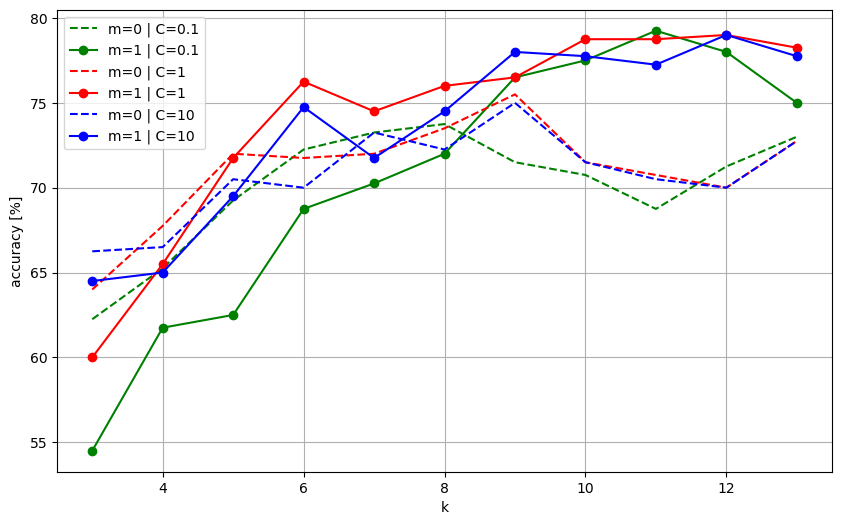

In [11]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(style="whitegrid")

dataset = 1

# plt.figure(figsize=(10, 6))
# plt.ylim((0, 100))
# plt.plot(ks, [ 100 * accuracies[dataset][(k,0,1,0.1)] for k in ks ], 'g--', label='m=0 | C=0.1')
# plt.plot(ks, [ 100 * accuracies[dataset][(k,1,1,0.1)] for k in ks ], 'g-o', label='m=1 | C=0.1')

# plt.plot(ks, [ 100 * accuracies[dataset][(k,0,1,1)] for k in ks ], 'r--', label='m=0 | C=1')
# plt.plot(ks, [ 100 * accuracies[dataset][(k,1,1,1)] for k in ks ], 'r-o', label='m=1 | C=1')

# plt.plot(ks, [ 100 * accuracies[dataset][(k,0,1,10)] for k in ks ], 'b--', label='m=0 | C=10')
# plt.plot(ks, [ 100 * accuracies[dataset][(k,1,1,10)] for k in ks ], 'b-o', label='m=1 | C=10')
# plt.xlabel('k')
# plt.ylabel('accuracy [%]')
# plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(ks, [ 100 * myaccuracies[dataset][(k,0,1,0.1)] for k in ks ], 'g--', label='m=0 | C=0.1')
plt.plot(ks, [ 100 * myaccuracies[dataset][(k,1,1,0.1)] for k in ks ], 'g-o', label='m=1 | C=0.1')

plt.plot(ks, [ 100 * myaccuracies[dataset][(k,0,1,1)] for k in ks ], 'r--', label='m=0 | C=1')
plt.plot(ks, [ 100 * myaccuracies[dataset][(k,1,1,1)] for k in ks ], 'r-o', label='m=1 | C=1')

plt.plot(ks, [ 100 * myaccuracies[dataset][(k,0,1,10)] for k in ks ], 'b--', label='m=0 | C=10')
plt.plot(ks, [ 100 * myaccuracies[dataset][(k,1,1,10)] for k in ks ], 'b-o', label='m=1 | C=10')

plt.xlabel('k')
plt.ylabel('accuracy [%]')
plt.legend(); plt.grid();

In [1]:
# dataset = 1
# testset = pd.read_csv(f'data/Xte{dataset}.csv')
# X_test = preprocess(testset['seq'])

# k = 11
# m = 1
# K_train = kernels[dataset][(k,m)]
# K_test = mismatch_kernel(X_test, Y=Xs[dataset], k=k, m=m, normalize=True)

# print("a", K_test.shape)

# C = 1
# svm = SVM(C=C)
# y_train = ys[dataset]
# svm.fit(K_train, y_train)

# print("b", svm.alphas.shape)

# y_pred = svm.predict(K_test)
# y_pred = (y_pred > 0).astype(int)

# df_pred = pd.DataFrame({
#     "Id": testset['Id'], 
#     "Bound": y_pred}).set_index("Id").to_csv(f"Yte{dataset}.csv")